--2020-12-12 04:10:28--  https://uta.instructure.com/courses/61673/files/10505095/preview?verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps
Resolving uta.instructure.com (uta.instructure.com)... 54.145.38.170, 34.224.181.213, 52.21.165.220
Connecting to uta.instructure.com (uta.instructure.com)|54.145.38.170|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://a13430-10505095.cluster38.canvas-user-content.com/courses/13430~61673/files/13430~10505095/course%20files/public_files/2018-2019_NBA_stats.csv?download=1&inline=1&verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps [following]
--2020-12-12 04:10:28--  https://a13430-10505095.cluster38.canvas-user-content.com/courses/13430~61673/files/13430~10505095/course%20files/public_files/2018-2019_NBA_stats.csv?download=1&inline=1&verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps
Resolving a13430-10505095.cluster38.canvas-user-content.com (a13430-10505095.cluster38.canvas-user-content.com)... 3.230.70.68, 52.4

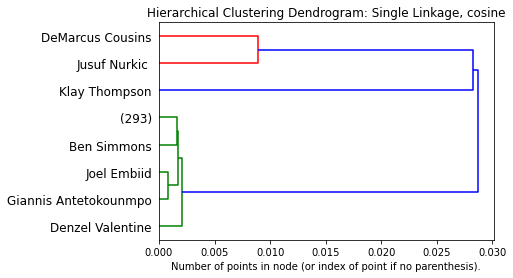

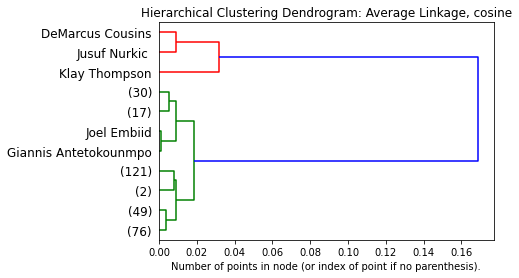

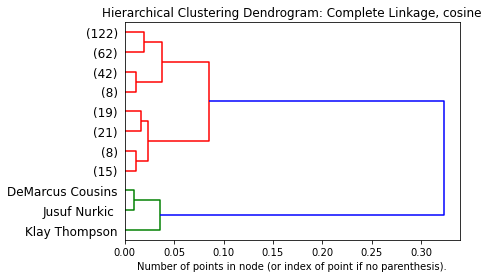

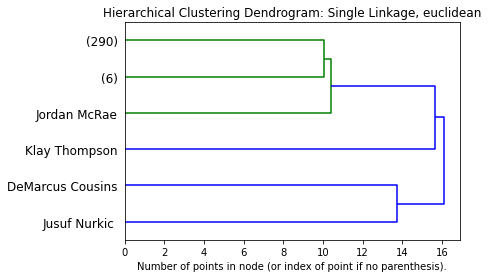

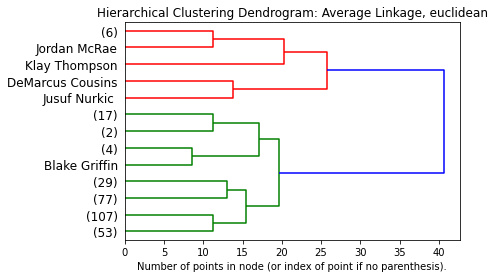

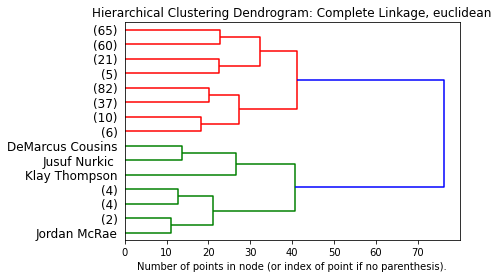

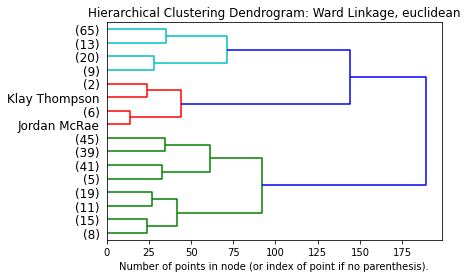

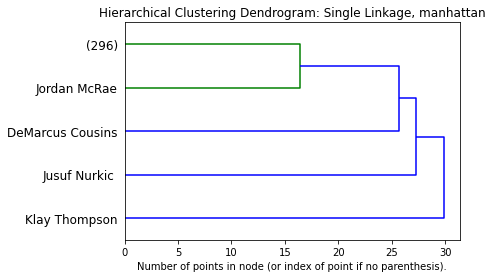

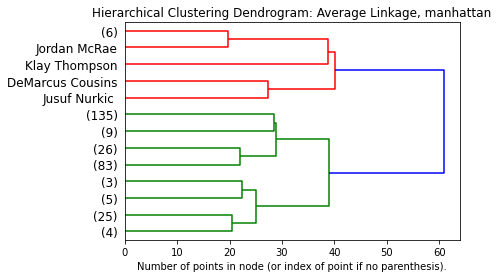

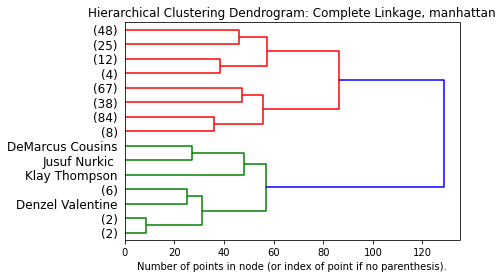

Labels

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 2
 2 2 2 2]

['James Harden', 'Giannis Antetokounmpo', 'Stephen Curry', 'Karl-Anthony Towns', 'Anthony Davis', 'LeBron James', 'Nikola Jokic', 'Damian Lillard', 'Bradley Beal', 'Joel Embiid', 'Andre Drummond', 'Kawhi Leonard', 'Nikola Vucevic', 'Paul George', 'Luka Doncic', 'Kemba Walker', 'Russell Westbrook', 'Ben Simmons', 'Donovan Mitchell', 'Devin Booker', 'Kyrie Irving', 'Trae Young', '

In [39]:
!wget -O 2018-2019_NBA_Stats.csv https://uta.instructure.com/courses/61673/files/10505095/preview?verifier=1qoqyIxNj5MjnRrfNGQsUpWHAQs0TDZiyDLfTKps

import numpy as np
from sklearn import cluster
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
import io

#Read from the csv file and return a Pandas DataFrame.
stats_file = '/content/2018-2019_NBA_Stats.csv'
nba = pd.read_csv(io.FileIO(stats_file))
nba 

#define dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
  
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

#drop unnesessary columns
data = nba.drop(['Position', 'Team', 'Player'],axis =1 )    

#List of algorithms
clustering_algorithms = (
    ('Single Linkage', 'single'),
    ('Average Linkage', 'average'),
    ('Complete Linkage', 'complete'),
    ('Ward Linkage', 'ward'),
)  

#distance metrics
affinity_metrics = ['cosine', 'euclidean', 'manhattan']

#apply the algorithm 
for metric in affinity_metrics: 
    for alg_name, alg in clustering_algorithms:
        if alg == 'ward' and metric != 'euclidean': continue
        model = cluster.AgglomerativeClustering(linkage=alg, affinity=metric, distance_threshold=0, n_clusters=None)
    
        model.fit(frame)
        plt.title('Hierarchical Clustering Dendrogram: ' + alg_name + ", " + metric)
        # plot the top five levels of the dendrogram
        plot_dendrogram(model, truncate_mode='level', p=3, labels=names.tolist(), orientation='right')
        plt.xlabel("Number of points in node (or index of point if no parenthesis).")
        plt.show()

#measure perfomance 
names = nba['Player']
labels_true = nba['Position']
print ("Labels")
print ()
print (labels) 
print ()
print(names.to_list())
print(labels_true.to_list())
labels_pred = labels
print ()
rand = metrics.adjusted_rand_score(labels_true, labels_pred)
mi = metrics.normalized_mutual_info_score(labels_true, labels_pred) 
silhouette = metrics.silhouette_score(data, labels_pred, metric='euclidean')
print("Adjusted Rand Index: " + str(rand))
print("Normalized Mutual Information: " + str(mi))
print("Silhouette Coefficient: " + str(silhouette))


